[1.  0.5 0.  0.  0. ]
[1.  0.5 0.  0.  0. ]
[0.   0.75 1.   1.   1.  ]
[0.   0.75 1.   1.   1.  ]
[1.   0.25 0.   0.   0.  ]
[1.   0.25 0.   0.   0.  ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[0.01002513 0.1026334  0.58578644 1.36754447 1.8       ]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
[1.8        1.36754447 0.58578644 0.1026334  0.01002513]
(np.float64(0.6666666666666667), np.float64(0.22222222222222243), np.float64(0.5656854249492306), np.float64(-0.5999999999999694))
(np.float64(0.6666666666666666), np.float64(0.2222222222222222), np.float64(0.565685424949238), np.float64(-0.6000000000000001))
0.49999999999999983
0.5
25.0
shape > -1 does not hold
-20.0
[196.96340748 206.5016174  208.46954245 214.97914016 227.91059022
 236.57749326 237.37113621 232.05586572 250.30224869 271.09164919
 282.09656855 293.06209465 304.79007769 344.02502782 389.36304501
 445.96347701 536.37575371 708.59941887 219.04584006   0.        ]
[ 119.64778249  120.4760677   129.9

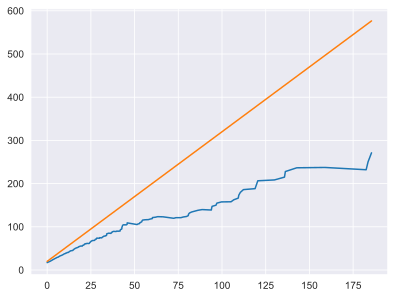

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.sandbox.distributions.genpareto import shape

plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv("supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


#### Question 1: Example

In [3]:
### how many purchases (rows in the table, not 'Quantity') were done by Male and Female customers?

#### Question 1 - solution: Example

In [4]:
m_amount = len(df[df['Gender'] == 'Male'])
f_amount = len(df[df['Gender'] == 'Female'])

# do not print any intermediate results
# print *only your final* result in the form of a data frame (for clarity)

result = [('purchases by male', m_amount), ('purchases by female', f_amount)]
pd.DataFrame(result)

,0,1
0,purchases by male,498
1,purchases by female,502


#### Question 2

In [5]:
### what is the average Rating for products in the "Home and lifestyle" Product line?

#### Question 2 - solution 

In [6]:
condition_q2 = (df['Product line'] == 'Home and lifestyle')
df_q2 = df[condition_q2]
rating = df_q2['Rating']
mean_rating = rating.mean()
result_q2 = [('Average Rating for products in "Home and lifestyle" Product line', mean_rating)]
pd.DataFrame(result_q2)


,0,1
0,"Average Rating for products in ""Home and lifes...",6.8375


#### Question 3

In [7]:
### how many products in each Product line were sold during the first week (days 1-7 including) of February 2019?
### use the 'Quantity' column for that purpose - the number of products purchased

#### Question 3 - solution

In [8]:
wanted_dates = {
    "02/01/2019", "02/02/2019", "02/03/2019",
    "02/04/2019", "02/05/2019", "02/06/2019", "02/07/2019"
}
df_in_dates = df[df['Date'].apply(lambda x: x in wanted_dates)]
filtered_sales_in_date = df_in_dates.groupby('Product line')["Quantity"].sum().reset_index()
all_product_lines = pd.DataFrame(df['Product line'].unique(), columns=['Product line'])
all_sales_in_dates = pd.merge(left = all_product_lines,right = filtered_sales_in_date, on='Product line', how= 'left')
pd.DataFrame(all_sales_in_dates)


,Product line,Quantity
0,Electronic accessories,92
1,Fashion accessories,67
2,Food and beverages,132
3,Health and beauty,78
4,Home and lifestyle,87
5,Sports and travel,54


#### Question 4

In [9]:
### plot a bar chart showing the number of products per category computed in the previous question

#### Question 4 - solution


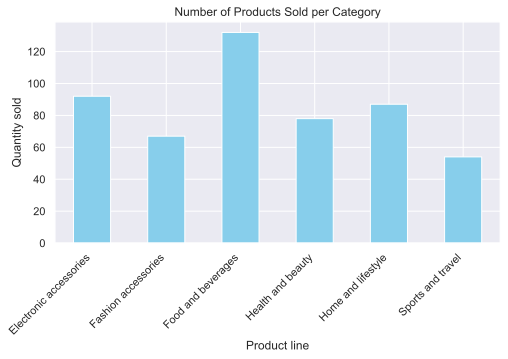

In [10]:
plot_q4 = pd.DataFrame(all_sales_in_dates)
plot_q4.plot(kind='bar', x='Product line', y='Quantity',legend=False,figsize=(8, 4),color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Products Sold per Category')
plt.ylabel("Quantity sold")
plt.show()

#### Question 5

In [11]:
### plot the same bar chart as above - split by gender (male, female)
### the split bar chart is called stacked bar: look up "plot stacked bar charts from a dataframe" to see how to plot it

#### Question 5 - solution

Text(0, 0.5, 'Quantity sold')

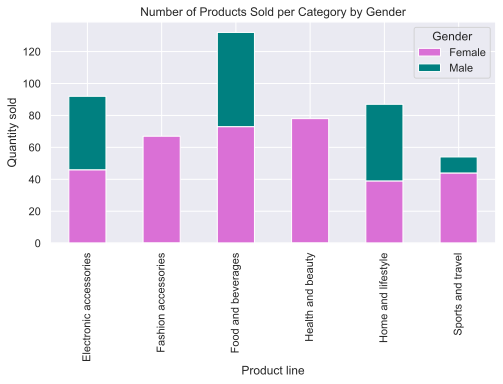

In [12]:
gender_and_product_line = df_in_dates.groupby(['Gender', 'Product line'])["Quantity"].sum().reset_index()
gender_and_product_line_all_options = pd.DataFrame([(x, y) for x in df['Product line'].unique() for y in df['Gender'].unique()],
                                columns=['Product line', 'Gender'])
gender_and_product_line_final = pd.merge(left = gender_and_product_line_all_options, right = gender_and_product_line, on=['Product line', 'Gender'], how='left')
gender_and_product_line_final.fillna(0, inplace = True)
pivot_data = gender_and_product_line_final.pivot(index='Product line', columns='Gender', values='Quantity')
pivot_data.plot(kind='bar',color=['#DA70D6', 'teal'],stacked=True)
plt.title('Number of Products Sold per Category by Gender')
plt.ylabel("Quantity sold")


#### Question 6

In [13]:
### what is the total sales ('Total') done by each Payment type during the whole period?
### use the full data in the dataset (not the first week of March) from now on

#### Question 6 - solution

In [14]:
pd.DataFrame(df.groupby('Payment')['Total'].sum())

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


#### Question 7

In [15]:
### plot a chart with total sales ('Total') of the "Sports and travel" products by calendar week (Monday-Sunday): 
### note the first and the last week can be incomplete (for instance, the data starts on Wednesday, and ends on Friday)
### assume all our sales data spans the same year (for instance, 2019)

### you can make use of the isocalendar() function: https://www.geeksforgeeks.org/isocalendar-function-of-datetime-date-class-in-python/

### x axis are weeks enumerated from the first to the last calendar week in the data
### y axis is the total sales that week

#### Question 7 - solution

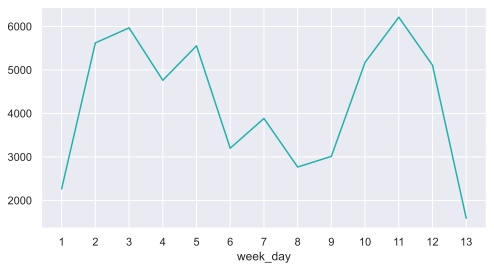

In [16]:
from datetime import date

def get_num_of_week(st_date:str) -> int:
    date = pd.to_datetime(st_date,format='%m/%d/%Y')
    year,week_num,weekday = date.isocalendar()
    return week_num


sport_and_travel_sales = df[df['Product line'] == 'Sports and travel'].copy()
sport_and_travel_sales['week_day'] = sport_and_travel_sales['Date'].apply(get_num_of_week)
res = sport_and_travel_sales.groupby('week_day')['Total'].sum()

ax = res.plot(x='week_day', y='Total',legend=False,figsize=(8, 4),color='lightseagreen')
ax.set_xticks(res.index)
plt.show()


#### Question 8

In [17]:
### plot a line chart of total sales ('Total') per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total amout of sales during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 8 - solution


<Figure size 800x400 with 0 Axes>

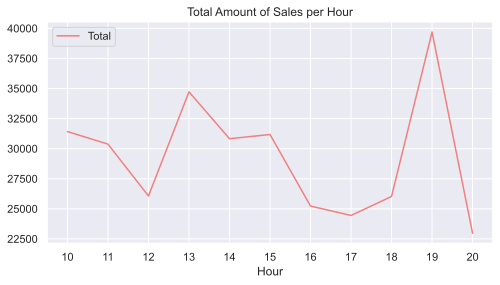

In [18]:
from datetime import datetime

df_q8 = df.copy()
df_q8['Hour'] = df_q8['Time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
res = df_q8.groupby('Hour')['Total'].sum().reset_index()
plt.figure(figsize=(8, 4))
res.plot(kind='line',x='Hour', y='Total',color="lightcoral")
plt.xticks(res['Hour'])
plt.title('Total Amount of Sales per Hour')
plt.show()


#### Question 9

In [19]:
### plot a line chart of the total number of purchases (rows) per hour in our dataset
### the x axis will be an hour (e.g., 9, 10, 11), and the y axis will be the total number of purchases during that hour
### (e.g., for 9 - all sales between 09:00 and 10:00)

#### Question 9 - solution

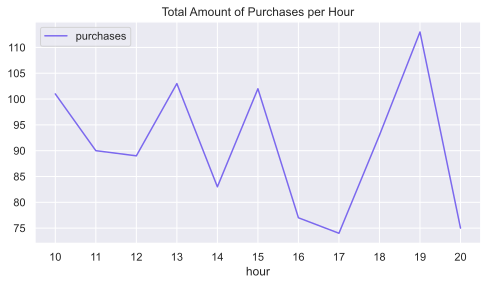

In [20]:
from datetime import datetime

df_copy = df.copy()
df_copy['hour'] = df_copy['Time'].apply(lambda x: datetime.strptime(x, '%H:%M').hour)
res = df_copy.groupby('hour')
hours_and_purchases = []
for hour, group in res:
    hours_and_purchases.append((hour, group.shape[0]))
    
res = pd.DataFrame(hours_and_purchases,columns=['hour','purchases'])

res.plot(kind='line',x='hour', y='purchases',color="mediumslateblue")
plt.xticks(res['hour'])
plt.title('Total Amount of Purchases per Hour')
plt.show()


#### Question 10

In [21]:
### what is the total income of strategic products by City?

### for each non-strategic product (as detailed in the product_types_strategy.csv file), 
###    display break down of total sales by cities - a table with three columns: 
###    (1) product line, (2) city and (3) total sales (the "Total" column) for that line in the city

#### Question 10 - solution

In [22]:
strategy_df = pd.read_csv('product_types_strategy.csv')

merged_df = df.merge(strategy_df, left_on='Product line', right_on='Product type', how='left')

strategic_df = merged_df[merged_df['strategic'] == 'yes']
strategic_income_by_city = strategic_df.groupby('City')['Total'].sum().reset_index()
strategic_income_by_city.columns = ['City', 'Total Income of Strategic Products']

non_strategic_df = merged_df[merged_df['strategic'] == 'no']
non_strategic_income_by_city = non_strategic_df.groupby(['Product line', 'City'])['Total'].sum().reset_index()
non_strategic_income_by_city.columns = ['product line', 'city',"total sales"]

display(strategic_income_by_city, non_strategic_income_by_city)


,City,Total Income of Strategic Products
0,Mandalay,72235.1910
1,Naypyitaw,75113.0835
2,Yangon,67450.6665


,product line,city,total sales
0,Fashion accessories,Mandalay,16413.3165
1,Fashion accessories,Naypyitaw,21560.0700
2,Fashion accessories,Yangon,16332.5085
3,Home and lifestyle,Mandalay,17549.1645
4,Home and lifestyle,Naypyitaw,13895.5530
5,Home and lifestyle,Yangon,22417.1955
